# Основы анализа данных в Python

*Тамбовцева Алла, НИУ ВШЭ*

## Множественная линейная регрессия. Эффекты взаимодействия. 

### Загрузка библиотек

Загрузим библиотеки `pandas`, `seaborn` и импортируем функцию `ols()` для линейной модели из `statsmodels`:

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

### Загрузка и подготовка данных

Как и в прошлый раз, загрузим данные по ссылке и переименуем столбцы, содержащие точки в названии (у формул внутри `ols()` есть одна особенность – они воспринимают точки как специальный символ, поэтому точки потом будут нам мешать):

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv")
df.rename(columns = {"yrs.since.phd" : "phd", "yrs.service" : "service"},  inplace = True)

### Множественная регрессия

Построим модель, на которой мы остановились на прошлом занятии. Модель, которая объясняет, каким образом заработная плата зависит от опыта работы и пола сотрудника университета:

In [3]:
model = ols("salary ~ service + sex", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     26.82
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.20e-11
Time:                        19:30:24   Log-Likelihood:                -4633.9
No. Observations:                 397   AIC:                             9274.
Df Residuals:                     394   BIC:                             9286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.236e+04   4740.188     19.484      

Вспомним, что мы можем сказать об этой модели. Вот ее уравнение:

$$
\widehat{salary}_i =  92360 +  747.61 \times service_i + 9071.8 \times Male_i.
$$

Проинтерпретируем коэффициенты (судя по p-value, они все значимы, правда, коэффициент при `sex` только на 10%-ном уровне значимости): 

* Среднее значение заработной платы за 9 месяцев для сотрудников без опыта работы (`service = 0`) женского пола (`Male = 0`) равно 92360 долларов.

* При прочих равных условиях, у сотрудников, чей стаж на 1 год больше, заработная плата, в среднем, выше на 747.61 долларов. То есть, если мы сравним двух коллег одного и того же пола (смысл «при прочих равных» для данного случая), в среднем, заработная плата того, кто работает на год больше, будет выше на 747.61 долларов.

* При прочих равных условиях, средняя заработная плата мужчин выше средней заработной платы женщин на 9071.8 долларов. То есть, если мы сравним двух коллег с одинаковым стажем, но разного пола, в среднем, зарплата коллеги мужского пола будет выше на 9071.8 долларов (смысл коэффициента при `sex[T.Male]` с учетом уточнения «при прочих равных»). 

Предсказательная сила у модели невысокая, $R^2$ равен 0.12. То есть, модель объясняет лишь 12% изменчивости заработной платы (то, что заработная плата отличается у разных людей, только на 12% можно объяснить различиями в опыте работы и полом человека). 

В прошлый раз мы также попытались (по крайней мере, графически) сравнить «влияние» стажа на заработную плату у мужчин и женщин и пришли к выводу, что, в среднем, заработная плата женщин ниже, однако именно у женщин увеличение стажа сопровождается более значительным ростом заработной платы:

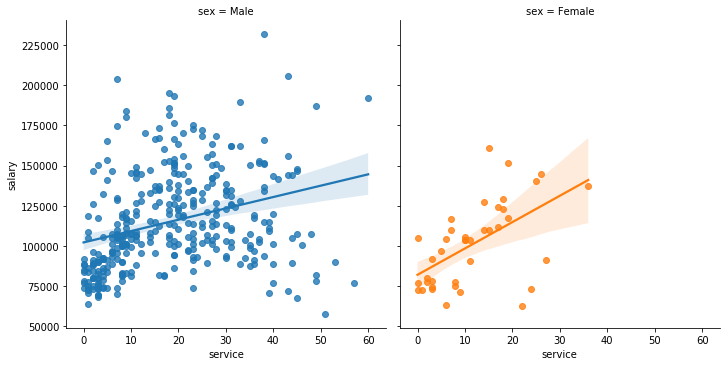

In [4]:
sns.lmplot(data = df, x = "service", y = "salary", hue = "sex", col = "sex");

### Линейная модель с эффектом взаимодействия

Теперь давайте учтем эту особенность в регрессионной модели. Добавим в модель выше эффект взаимодействия числа лет опыта работы и пола, который будет отражать то, что эффект опыта на заработную плату неодинаков у мужчин и женщин. В формуле в `statsmodels` эффект взаимодействия (*interaction term*) добавляется через `:` или через `*`. Эти операторы используются немного по-разному, пока посмотрим на первый вариант:

In [5]:
model2 = ols("salary ~ service + sex + service:sex", df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     18.98
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.62e-11
Time:                        19:30:25   Log-Likelihood:                -4632.4
No. Observations:                 397   AIC:                             9273.
Df Residuals:                     393   BIC:                             9289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.207e+04   7

Правда ли, что эффект опыта работы на заработную плату значимо отличается у мужчин и женщин? Да, если мы примем уровень значимости равным 10%, и нет, если мы примем уровень значимости равным 5%, p-value при эффекте взаимодействия равно 0.08, что больше 0.05 и меньше 0.1. В данном случае предлагаю согласиться с уровнем значимости 10%, все-таки вполне логично предположить, что сотрудников разного пола некоторые фактору по-разному сказываются на заработной плате, плюс, на графиках отличия в наклоне регрессионных прямых были довольно заметны.


Итак, теперь уравнение модели выглядит следующим образом:

$$
\widehat{salary}_i =  82070 +  1637 \times service_i + 20130 \times Male_i - 931 \times service_i \times Male_i.
$$

Интерпретировать коэффициенты множественной регрессии мы уже умеем, поэтому остановимся только на эффекте взаимодействия. Чтобы корректным и понятным образом объяснить коэффициент ($-931$), нам потребуется вычислить предельные эффекты пола на заработную плату и опыта работа на заработную плату. Специальных функций для вычисления предельных эффектов в случае линейных моделей не предусмотрено, поэтому определим их самостоятельно на основе уравнения выше.

Предельный эффект опыта работы на заработную плату (находим слагаемые с `service` и относимся к `Male` как к какому-то фиксированному числу, а не переменной, более формально – находим частную производную по переменной `service`):

$$
\text{marginal effect of service} = 1637 - 931 \times Male.
$$

Подставим в это выражение `Male = 0` и `Male = 1` и вычислим предельный эффект опыта на зарплату для женщин и мужчин. Получим значение 1637 для женщин и 706 для мужчин. Проинтерпретируем полученный результат:

* при прочих равных условиях, если мы будем рассматривать только сотрудников женского пола, каждый дополнительный год опыта работы будет сопровождаться увеличением годовой заработной платы, в среднем, на 1637 долларов;

* при прочих равных условиях, если мы будем рассматривать только сотрудников мужского пола, каждый дополнительный год опыта работы будет сопровождаться увеличением годовой заработной платы, в среднем, на 706 долларов.

Теперь вычислим предельный эффект пола на заработную плату (находим слагаемые с `Male` и относимся к `service` как к какому-то фиксированному числу, а не переменной, более формально – находим частную производную по переменной `Male`):

$$
\text{marginal effect of Male} = 20130 - 931 \times service.
$$

Так как опыт работы – количественный показатель, подставить каких-то два значения и получить исчерпывающую интерпретацию эффекта мы не сможем. Можем только сказать, что у людей с большим опытом работы эффект пола на заработную плату меньше (коэффициент при `service` отрицательный), то есть у более старших сотрудников (рост стажа неизбежно сопровождается увеличением возраста) разница в заработной плате мужчин и женщин уже не такая сильная. 

Чтобы как-то описать эффект пола в общем виде, давайте вычислим его для среднестатистического сотрудника – со средним значением опыта работы:

In [6]:
df["service"].mean()

17.614609571788414

Тогда:

$$
\text{marginal effect of Male} = 20130 - 931 \times 17.61 = 3735.09.
$$

Итого, при прочих равных условиях, если мы будем рассматривать сотрудников с одинаковым числом лет опыта работы, равным среднему по выборке (примерно 18 лет), у сотрудников мужского пола заработная плата, в среднем, будет на 3735.09 выше, чем у сотрудников женского пола. При желании можно оценить такой эффект для человека с минимальным/максимальным числом лет опыта работы (да и вообще любым оптытом, который нам интересен с содержательной точки зрения).

Точно такую же модель можно было построить, используя другой оператор, оператор `*`. Этот оператор позволяет записывать модель в более коротком виде, запись `a * b` заменяет запись `a + b + a:b`. Для нашей модели короткая запись выглядит следующим образом:

In [7]:
model3 = ols("salary ~ sex * service", df).fit()
print(model3.summary())  # то же самое

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     18.98
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.62e-11
Time:                        19:30:25   Log-Likelihood:                -4632.4
No. Observations:                 397   AIC:                             9273.
Df Residuals:                     393   BIC:                             9289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.207e+04   7

**Важно:** вне зависимости от того, какой из операторов мы используем, главное понимать, что если мы включаем эффект взаимодействия в модель, переменные, которые входят в этот эффект, обязательно должны быть включены в модель по отдельности, иначе смысл взаимодействия и возможность оценки предельных эффектов терятся. С содержательной точки зрения это тоже объяснимо: если мы говорим, что опыт по-разному сказывается на заработной плате в зависимости от пола, будет странным считать, что сам пол и опыт на заработную плату никак не влияет.

В завершение разговора об эффектах взаимодействия давайте посмотрим на пример того, как, используя эффекты взаимодействия учесть в линейной модели нелинейный характер взаимосвязи между независимой и зависимой переменной. Посмотрим на диаграмму рассеивания для опыта работы и заработной платы:

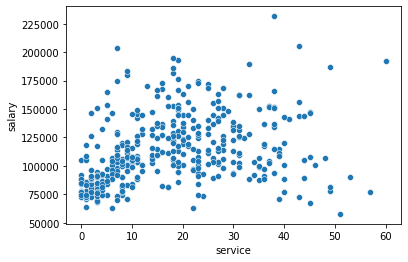

In [8]:
sns.scatterplot(data = df, x = "service", y = "salary")

Невооруженным глазом видно, что связь между переменными больше похожа на квадратичную, нежели на линейную: при опыте работы до 25 лет увеличение опыта работы сопровождается увеличением заработной платы, а при опыте работы более 25 лет увеличение опыта работы в большинстве случаев сопровождается снижением заработной платы. Такая взаимосвязь неслучайна. Опыт работы тесно связан с возрастом человека, а возраст человека, действительно, нелинейно связан с заработной платой.

Если бы у нас была обычная парная регрессия, где кроме опыта и заработной платы ничего не учитывается, мы могли бы выбрать другой тип модели, квадратичную. Оценивать такую модель мы сейчас не будем, просто построим соответствующий график с помощью функции `regplot()` из библиотеки `seaborn`:

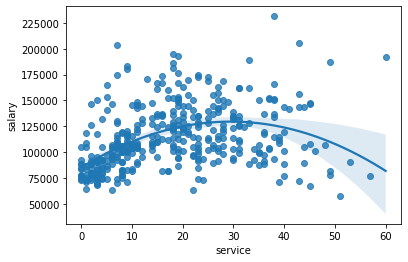

In [9]:
sns.regplot(data = df, x = "service", y = "salary", order = 2)

Функция `regplot()` умеет строить парные регрессии разного вида, необязательно линейные. В данном случае мы добавили аргумент `order`, отвечающий за степень многочлена, который мы хотим использовать для описания взаимосвязи. Раз зависимость квадратичная, то `order = 2`, парабола описывается уравнением $y = ax^2 + bx + c$. Эта функция довольно полезная, встретим ее позже при знакомстве с логистической регрессией.

Учтем эту «квадратичность» в модели, просто добавив опыт работы, возведенный в квадрат (обратите внимание, сама модель линейная, оценивается медом наименьших квадратов, OLS):

In [10]:
model4 = ols("salary ~ service + service^2", df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.59e-11
Time:                        19:30:25   Log-Likelihood:                -4634.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     394   BIC:                             9287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.966e+04   2424.113     41.113      

Сама по себе оценка коэффициента при `service^2` не является статистически значимой, это нестрашно, мы добавляли эту переменную в модель не для того, чтобы оценить ее эффект, а для того, чтобы как-то учесть нелинейный характер взаимосвязи. При этом коэффициент при `service^2` отрицательный, что логично, отрицательный коэффициент при квадрате независимой переменной означает, что зависимость описывается параболой с ветвями вниз (выпуклая вверх, как на графике выше). При этом интерпретировать коэффициент при `service`, без квадрата, мы можем как обычно: у человека с опытом работы на 1 год выше заработная плата, в среднем, выше на 1786 долларов. 

Как эта история с возведением в квадрат связана с эффектом взаимодействия? Очень просто: `service^2` – это то же самое, что эффект взаимодействия опыта работы с самим собой! Единственное, если записать в `ols()` уравнение через `:`, Python нас не поймет, он автоматически уберет «дублирование»:

In [11]:
print(ols("salary ~ service + service:service", df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     49.85
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           7.53e-12
Time:                        19:30:26   Log-Likelihood:                -4635.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     395   BIC:                             9283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.997e+04   2416.605     41.370      0.0

Чтобы он понял нас правильно, нужно использовать явное возведение в квадрат или дописывать вокруг такого эффекта `I()` и все равно возводить в квадрат:

In [12]:
print(ols("salary ~ service + I(service^2)", df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.59e-11
Time:                        19:30:26   Log-Likelihood:                -4634.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     394   BIC:                             9287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.966e+04   2424.113     41.